## DATA PRE-PROCESSING

In [89]:
!pip show pyspark

Name: pyspark
Version: 3.5.2
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /opt/conda/envs/csgy-6513-fall/lib/python3.11/site-packages
Requires: py4j
Required-by: 


In [90]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [91]:
spark.sparkContext.setLogLevel("ERROR")


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("SpotifyAnalysis").getOrCreate()


### General Insights on Data

In [93]:
# Load CSVs into Spark DataFrames
df_tracks = spark.read.csv('tracks.csv', header=True, inferSchema=True)
df_artists = spark.read.csv('artists.csv', header=True, inferSchema=True)


In [94]:
# Display first 5 rows
df_tracks.show(5)


+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|                  id|                name|popularity|duration_ms|explicit|            artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|35iwgR4jXetI318WE...|               Carve|         6|     126903|       0|            ['Uli']|['45tIt06XoI0Iio4...|  1922-02-22|       0.645| 0.445|  0| -13.338|   1|      0.451|       0.674|           0.744|   0.151|  0.127|104.851|             3|


In [95]:
# Get the number of rows and columns
df_tracks_count = df_tracks.count()
df_tracks_columns = len(df_tracks.columns)
print(f"Rows: {df_tracks_count}, Columns: {df_tracks_columns}")


Rows: 586672, Columns: 20


In [96]:
from pyspark.sql.functions import count, when, col

# Summary of the data including non-null entries and their data types
df_tracks.printSchema()
# Count of non-null values per column
df_tracks.select([count(when(col(c).isNotNull(), c)).alias(c) for c in df_tracks.columns]).show()



root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- id_artists: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)



+------+------+----------+-----------+--------+-------+----------+------------+------------+------+------+--------+------+-----------+------------+----------------+--------+-------+------+--------------+
|    id|  name|popularity|duration_ms|explicit|artists|id_artists|release_date|danceability|energy|   key|loudness|  mode|speechiness|acousticness|instrumentalness|liveness|valence| tempo|time_signature|
+------+------+----------+-----------+--------+-------+----------+------------+------------+------+------+--------+------+-----------+------------+----------------+--------+-------+------+--------------+
|586672|586601|    586672|     586672|  586672| 586672|    586660|      586660|      586660|586660|586660|  586660|586660|     586660|      586660|          586660|  586660| 586660|586660|        586660|
+------+------+----------+-----------+--------+-------+----------+------------+------------+------+------+--------+------+-----------+------------+----------------+--------+-------+---

In [97]:
from pyspark.sql.functions import col, count, when

# Count missing values per column
df_tracks.select([count(when(col(c).isNull(), c)).alias(c) for c in df_tracks.columns]).show()


+---+----+----------+-----------+--------+-------+----------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+--------------+
| id|name|popularity|duration_ms|explicit|artists|id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|time_signature|
+---+----+----------+-----------+--------+-------+----------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+--------------+
|  0|  71|         0|          0|       0|      0|        12|          12|          12|    12| 12|      12|  12|         12|          12|              12|      12|     12|   12|            12|
+---+----+----------+-----------+--------+-------+----------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+--------------+



In [98]:
# Count duplicated rows
df_tracks.count() - df_tracks.dropDuplicates().count()


0

In [99]:
# Generates descriptive statistics for numeric columns
df_tracks.describe().show()


+-------+--------------------+----------------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                  id|                        name|          popularity|         duration_ms|            explicit|          artists|          id_artists|        release_date|        danceability|              energy|                 key|            loudness|                mode|         speechiness|        acousticness|    instrumentalness|            liveness|             valence|               tempo|      time_signature|
+-------+--------------------+----------------------------+--------------------+--------------------+--------------------+--------

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

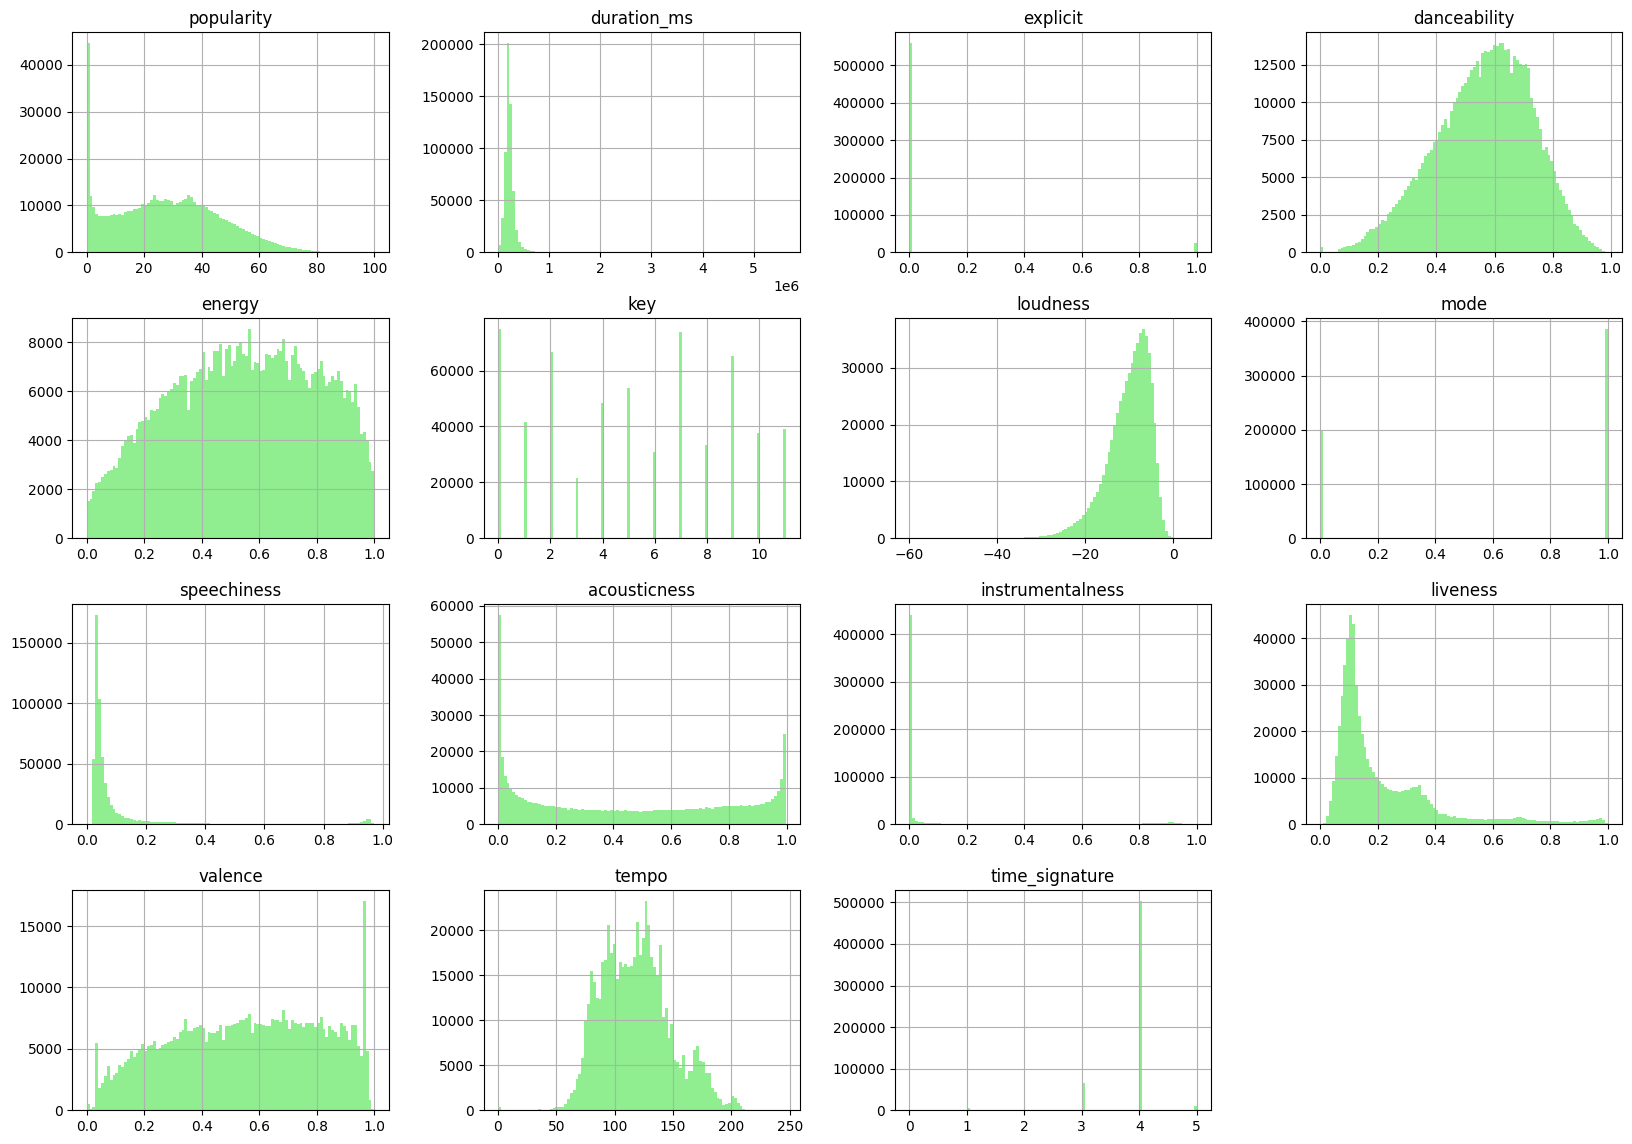

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Plot distribution of each variable, binning numerical data
df_tracks = pd.read_csv('tracks.csv')
df_tracks.hist(bins = 100, color = 'lightgreen', figsize = (20, 14))

In [102]:
from pyspark.sql.functions import countDistinct

# Get the count of unique values for each categorical feature
category_df.select([countDistinct(col(c)).alias(c) for c in category_df.columns]).show()


+------+------+----------+-----------+--------+-------+----------+------------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+------+--------------+
|    id|  name|popularity|duration_ms|explicit|artists|id_artists|release_date|danceability|energy| key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence| tempo|time_signature|
+------+------+----------+-----------+--------+-------+----------+------------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+------+--------------+
|586672|446398|      1359|     123531|    1275| 113566|    114876|       21577|        2627|  3179|1407|   29782|2308|       2401|        5542|            5625|    2574|   2200|123902|          2705|
+------+------+----------+-----------+--------+-------+----------+------------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+------+--------------+


## DATA CLEANING


#### Convert units of "Duration"

In [103]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("SpotifyAnalysis").getOrCreate()

# Load dataset into PySpark DataFrame
df_tracks = spark.read.csv('tracks.csv', header=True, inferSchema=True)

# Show first 10 rows of specific column
df_tracks.select('duration_ms').show(10)




+-----------+
|duration_ms|
+-----------+
|     126903|
|      98200|
|     181640|
|     176907|
|     163080|
|     178933|
|     134467|
|     161427|
|     310073|
|     181173|
+-----------+
only showing top 10 rows



In [104]:
from pyspark.sql.functions import col

# Convert milliseconds to seconds
df_tracks = df_tracks.withColumn('duration', (col('duration_ms') / 1000).cast('int'))


In [127]:
# Rename the column
df_tracks = df_tracks.withColumnRenamed('duration_ms', 'duration')




#### Convert Data Type of 'Explicit'

In [106]:
# View first 10 rows of `explicit`
df_tracks.select("explicit").limit(10).show()

# Convert to boolean
from pyspark.sql.functions import col

df_tracks = df_tracks.withColumn('explicit', col('explicit').cast('boolean'))


+--------+
|explicit|
+--------+
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
+--------+



In [107]:
from pyspark.sql.functions import col

df_tracks = df_tracks.withColumn('explicit', col('explicit').cast('boolean'))

df_tracks.select("explicit").limit(10).show()


+--------+
|explicit|
+--------+
|   false|
|   false|
|   false|
|   false|
|   false|
|   false|
|   false|
|   false|
|   false|
|   false|
+--------+



#### Clean "Artists" names

In [108]:
# View first 10 rows of `artists`
df_tracks.select("artists").limit(10).show()

# Clean `artists` column
from pyspark.sql.functions import regexp_replace

df_tracks = df_tracks.withColumn('artists', regexp_replace(col('artists'), '[\\[\\]\']', ''))


+-------------------+
|            artists|
+-------------------+
|            ['Uli']|
|['Fernando Pessoa']|
|['Ignacio Corsini']|
|['Ignacio Corsini']|
|    ['Dick Haymes']|
|    ['Dick Haymes']|
|  ['Francis Marty']|
|    ['Mistinguett']|
|    ['Greg Fieler']|
|['Ignacio Corsini']|
+-------------------+



In [109]:
from pyspark.sql.functions import col, regexp_replace

df_tracks = df_tracks.withColumn('artists', regexp_replace(col('artists'), r'[\[\]\'"]', ''))
df_tracks.select("artists").limit(10).show()


+---------------+
|        artists|
+---------------+
|            Uli|
|Fernando Pessoa|
|Ignacio Corsini|
|Ignacio Corsini|
|    Dick Haymes|
|    Dick Haymes|
|  Francis Marty|
|    Mistinguett|
|    Greg Fieler|
|Ignacio Corsini|
+---------------+



#### Convert data type of "release_date"

In [110]:
# View first 10 rows of `release_date`
df_tracks.select("release_date").limit(10).show()

# Convert `release_date` to datetime
from pyspark.sql.functions import to_date

df_tracks = df_tracks.withColumn('release_date', to_date(col('release_date')))


+------------+
|release_date|
+------------+
|  1922-02-22|
|  1922-06-01|
|  1922-03-21|
|  1922-03-21|
|        1922|
|        1922|
|        1922|
|        1922|
|        1922|
|  1922-03-29|
+------------+



In [111]:
from pyspark.sql.functions import to_date

df_tracks = df_tracks.withColumn('release_date', to_date(col('release_date'), 'yyyy-MM-dd'))

df_tracks.select("release_date").limit(10).show()


+------------+
|release_date|
+------------+
|  1922-02-22|
|  1922-06-01|
|  1922-03-21|
|  1922-03-21|
|  1922-01-01|
|  1922-01-01|
|  1922-01-01|
|  1922-01-01|
|  1922-01-01|
|  1922-03-29|
+------------+



## DATA ANALYSIS

In [112]:
from pyspark.sql.functions import col

popularity_threshold = 70
popular_songs = df_tracks.filter(col('popularity') >= popularity_threshold)


In [113]:
from pyspark.sql.functions import count

popular_count = popular_songs.groupBy('artists').agg(count('artists').alias('number_of_popular_songs'))


#### TOP 20 MOST POPULAR ARTISTS

In [114]:
popular_artists = popular_count.orderBy(col('number_of_popular_songs').desc()).limit(20)
popular_artists.show()


+-------------+-----------------------+
|      artists|number_of_popular_songs|
+-------------+-----------------------+
| Taylor Swift|                     90|
|          BTS|                     65|
|   Juice WRLD|                     39|
|One Direction|                     37|
|    Bad Bunny|                     34|
|Billie Eilish|                     29|
|Ariana Grande|                     28|
|        Drake|                     28|
|   Bruno Mars|                     26|
| Harry Styles|                     26|
| Lana Del Rey|                     24|
|   The Weeknd|                     24|
|       Eminem|                     23|
|Justin Bieber|                     22|
|Morgan Wallen|                     22|
|   Ed Sheeran|                     22|
|           NF|                     22|
|        Queen|                     21|
|   Katy Perry|                     21|
|   Kanye West|                     20|
+-------------+-----------------------+



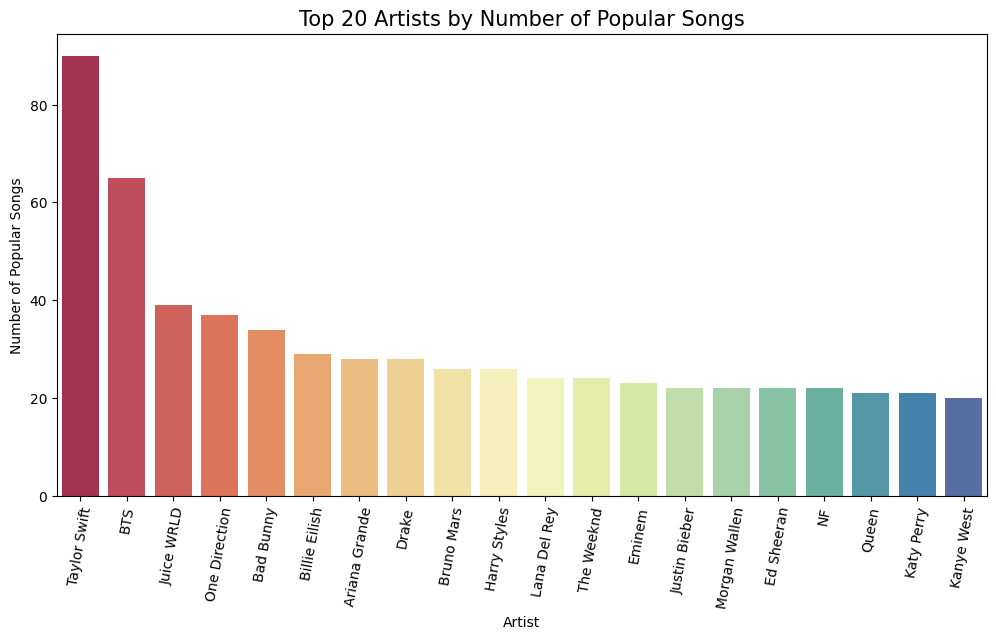

In [115]:
# Bar plot for Top 20 artists
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='artists', y='number_of_popular_songs', data=popular_artists_pandas, hue='artists', palette='Spectral', legend=False)

# Customize labels and titles
plt.title('Top 20 Artists by Number of Popular Songs', c='black', fontsize=15)
plt.xlabel('Artist')
plt.xticks(rotation=80)
plt.ylabel('Number of Popular Songs')

plt.show()
